In [6]:
import numpy as np
import pathlib


# root directory
root = pathlib.Path.cwd() / 'Data' / '2018'


def get_filenames_of_path(path: pathlib.Path, ext: str = '*'):
    """Returns a list of files in a directory/path. Uses pathlib."""
    filenames = [file for file in path.glob(ext) if file.is_file()]
    return filenames


# input and target files
inputs = get_filenames_of_path(root / 'ISIC2018_Task1-2_Training_Input', ext='*.jpg')
targets = get_filenames_of_path(root / 'ISIC2018_Task1_Training_GroundTruth', ext='*.png')

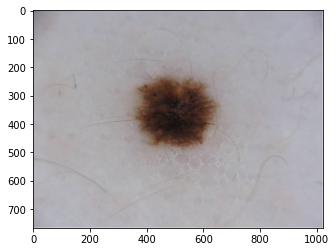

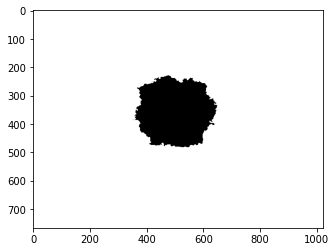

In [49]:
from matplotlib import pyplot as plt
from skimage.io import imread

sample_input = imread(str(inputs[1]))
sample_target = imread(str(targets[1]))

plt.imshow(sample_input)
plt.show()
plt.imshow(sample_target, cmap='Greys')
plt.show()

In [25]:
print(f'sample_input = shape: {sample_input.shape}; type: {sample_input.dtype}')
print(f'sample_input = min: {sample_input.min()}; max: {sample_input.max()}')
print(f'sample_target = shape: {sample_target.shape}; class: {np.unique(sample_target)}; type: {sample_target.dtype}')

sample_input = shape: (1536, 2048, 3); type: uint8
sample_input = min: 5; max: 255
sample_target = shape: (1536, 2048); class: [  0 255]; type: uint8


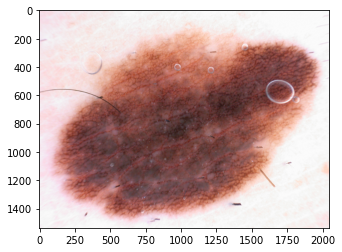

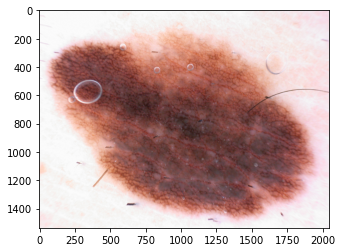

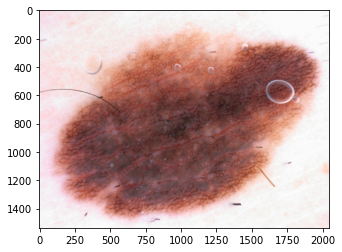

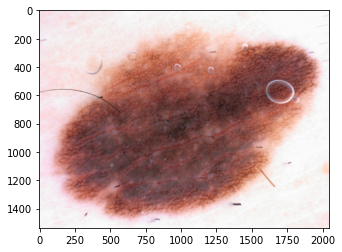

In [48]:
import albumentations as A

# origin
plt.imshow(sample_input)
plt.show()

# horizontal flip
input_argument_HorizontalFlip = A.HorizontalFlip(p=1).apply(sample_input)
plt.imshow(input_argument_HorizontalFlip)
plt.show()

# # RandomBrightness
# input_argument_RandomBrightness = A.RandomBrightness(limit=1,p=1).apply(sample_input)
# plt.imshow(input_argument_RandomBrightness)
# plt.show()

# # RandomContras
# input_argument_RandomContrast = A.RandomContrast(limit=1,p=1).apply(sample_input)
# plt.imshow(input_argument_RandomContrast)
# plt.show()


# RandomGamma
input_argument_RandomGamma = A.RandomGamma().apply(sample_input)
plt.imshow(input_argument_RandomGamma)
plt.show()


# GaussianBlur 
input_argument_GaussianBlur = A.GaussianBlur(blur_limit=[3, 111]).apply(sample_input)
plt.imshow(input_argument_GaussianBlur)
plt.show()


In [46]:
print("Origin")
print(sample_input[:,:,1])

# print("RandomContrast")
# print(input_argument_RandomContrast[:,:,0])

# print("RandomBrightness")
# print(input_argument_RandomBrightness[:,:,1])

print("RandomGamma")
print(input_argument_RandomGamma[:,:,1])

print("GaussianBlur")
print(input_argument_GaussianBlur[:,:,1])

Origin
[[217 219 214 ... 252 252 252]
 [225 220 215 ... 250 251 253]
 [215 220 218 ... 250 249 249]
 ...
 [252 246 244 ... 232 231 235]
 [243 242 244 ... 231 242 234]
 [246 243 240 ... 228 235 237]]
RandomGamma
[[217 219 214 ... 252 252 252]
 [225 220 215 ... 250 251 253]
 [215 220 218 ... 250 249 249]
 ...
 [252 246 243 ... 232 231 235]
 [243 242 243 ... 231 242 234]
 [246 243 240 ... 227 235 237]]
GaussianBlur
[[220 219 217 ... 251 252 252]
 [220 219 217 ... 251 251 251]
 [219 219 219 ... 250 250 250]
 ...
 [246 244 242 ... 233 233 234]
 [245 244 243 ... 234 235 236]
 [244 243 242 ... 233 236 237]]


In [43]:
np.array_equal(sample_input, input_argument_GaussianBlur)

False